In [11]:
import pandas as pd
import json
import re
from pprint import pprint

In [16]:
articles = []
for i in range(10):
    with open(f'project_articles/article_{i}.json', 'r') as article_json:
        article = json.load(article_json)    ## load instead of loads
        articles = articles + [article]
        article_json.close()

df = pd.json_normalize(articles)
df

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,...,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,subsection_name
0,Chinese merchants have been huge on Amazon. Bu...,https://www.nytimes.com/2022/05/24/technology/...,Chinese merchants have been huge on Amazon. Bu...,One essential ingredient for Amazon’s success ...,B,6,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'internal-sub-on...",2022-05-24T16:39:10+0000,...,on tech newsletter,None,An American Comeback on Amazon,None,None,None,By Shira Ovide,"[{'firstname': 'Shira', 'middlename': None, 'l...",None,NaN
1,Why has the union campaign spread so much furt...,https://www.nytimes.com/2022/05/12/business/ec...,Why has the union campaign spread so much furt...,Roughly six weeks after successful union votes...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Organized Labor...",2022-05-12T09:00:29+0000,...,None,None,"Unions Blitz Starbucks, And Struggle At Amazon",None,None,None,By Noam Scheiber,"[{'firstname': 'Noam', 'middlename': None, 'la...",None,Economy
2,Company officials said the terminations were t...,https://www.nytimes.com/2022/05/06/technology/...,Company officials said the terminations were t...,After Amazon employees at a massive warehouse ...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Organized Labor...",2022-05-06T17:08:18+0000,...,None,None,Amazon Managers Fired In Wake of Union Victory,None,None,None,By Karen Weise and Noam Scheiber,"[{'firstname': 'Karen', 'middlename': None, 'l...",None,NaN
3,Workers had accused the companies of unlawful ...,https://www.nytimes.com/2022/05/06/business/ec...,Workers had accused the companies of unlawful ...,In a sign that federal labor officials are clo...,B,7,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Workplace Hazar...",2022-05-06T21:09:38+0000,...,None,None,Labor Board Finds Merit In Claims Against Amazon,None,None,None,By Noam Scheiber,"[{'firstname': 'Noam', 'middlename': None, 'la...",None,Economy
4,The results were a setback for the upstart Ama...,https://www.nytimes.com/2022/05/02/technology/...,The results were a setback for the upstart Ama...,The growing labor organizing efforts at Amazon...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Organized Labor...",2022-05-02T18:50:22+0000,...,None,None,Amazon Labor Union Loses Its Vote at a Second ...,None,None,None,"By Karen Weise, Noam Scheiber and Coral Murphy...","[{'firstname': 'Karen', 'middlename': None, 'l...",None,NaN
5,The White House visit by rank-and-file union m...,https://www.nytimes.com/2022/05/05/business/ec...,The White House visit by rank-and-file union m...,"President Biden, Vice President Kamala Harris ...",B,7,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Organized Labor...",2022-05-05T21:50:48+0000,...,None,None,Organizers For Unions Get Meeting With Biden,None,None,None,By Noam Scheiber,"[{'firstname': 'Noam', 'middlename': None, 'la...",None,Economy
6,Nations are accelerating efforts to control da...,https://www.nytimes.com/2022/05/23/technology/...,Nations are accelerating efforts to control da...,"Every time we send an email, tap an Instagram ...",B,1,The New York Times,[],"[{'name': 'subject', 'value': 'Data-Mining and...",2022-05-23T09:00:29+0000,...,None,None,Countries Are Building Boundaries For Data,None,None,None,By David McCabe and Adam Satariano,"[{'firstname': 'David', 'middlename': None, 'l...",None,NaN
7,"Flush with cash, Facebook, Apple, Amazon, Micr...",https://www.nytimes.com/2022/05/20/technology/...,"Flush with cash, Facebook, App

In [12]:
def keyword_get_value(row_val):
    keyword_lst=[]
    for x in range(len(row_val)):
        keyword_lst.append(row_val[x]['value'])
    
    keyword = ' '.join(keyword_lst) # join item from a list into a string
    keyword = re.sub(r'[^\w\s]',' ',keyword) # remove punctuation
    return keyword

In [13]:
df['keywords_parse'] = df['keywords'].apply(lambda x: keyword_get_value(x))
df[['keywords','keywords_parse']]

,keywords,keywords_parse
0,"[{'name': 'subject', 'value': 'internal-sub-on...",internal sub only nl Computers and the Interne...
1,"[{'name': 'subject', 'value': 'Organized Labor...",Organized Labor Amazon com Inc Starbucks Corpo...
2,"[{'name': 'subject', 'value': 'Organized Labor...",Organized Labor Warehouses E Commerce Computer...
3,"[{'name': 'subject', 'value': 'Workplace Hazar...",Workplace Hazards and Violations Organized Lab...
4,"[{'name': 'subject', 'value': 'Organized Labor...",Organized Labor Warehouses E Commerce Computer...
5,"[{'name': 'subject', 'value': 'Organized Labor...",Organized Labor United States Politics and Gov...
6,"[{'name': 'subject', 'value': 'Data-Mining and...",Data Mining and Database Marketing Data Storag...
7,"[{'name': 'subject', 'value': 'Computers and t...",Computers and the Internet Alphabet Inc Google...
8,"[{'name': 'organizations', 'value': 'Amazon.co...",Amazon com Inc E Commerce Company Reports
9,"[{'name': 'subject', 'value': 'Labor and Jobs'...",Labor and Jobs Organized Labor Warehouses E Co...


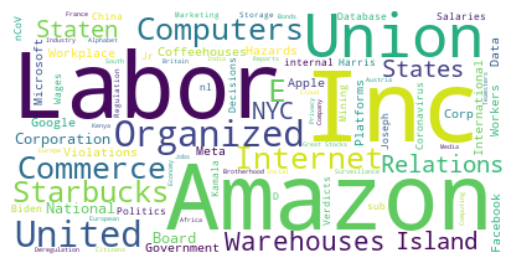

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

text = " ".join(word for word in df['keywords_parse']) # if column value in list 
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

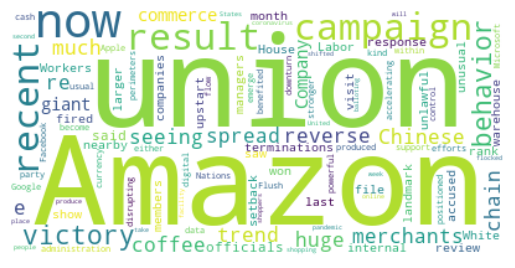

In [15]:
text = " ".join(word for word in df['abstract']) # if column value in list 
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()